Notebook: stock_price_predictions.  Author: Anastasia Ruzmaikina

In this notebook we are considering a toy example of the stock price data given by the file "exercise_data.csv".
In the notebook: stock_price_distributions, we used the Kolmogorov-Smirnov test to derive that the data set can be split into six disjoint subsets, each subset corresponding to the different probability distribution of the increments in stock price.

A question of interest to traders is to make a prediction of the future stock price given the information about the stock price up to the time t.

First we make a time series "time" by using pandas read_csv method.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
time = pd.read_csv('exercise_data.csv')

We can graph the series "time", showing the stock price as a function of time.

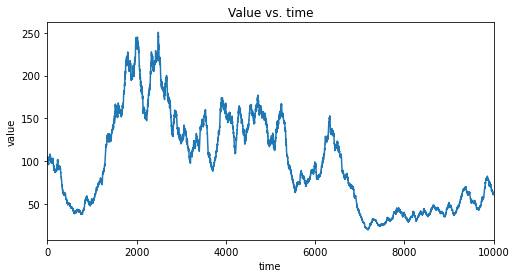

In [12]:
figure = plt.figure(figsize = (8,4))
subplot = plt.subplot()
x = time['time']
y = time['value']
subplot.set_title('Value vs. time')
subplot.set_xlabel('time')
subplot.set_xlim([0, 10000])
subplot.set_ylabel('value')
subplot.plot(x,y)
plt.savefig('data2.pdf')

As was shown in the notebook: stock-price, the series "time" is of the form: Y(t+1) = Y(t) + noise, and therefore one-step differences of the values should be considered. We store the series of one-step differences as the series "difference".

In [11]:
import pandas as pd
difference = time['value'].diff().dropna()

We can graph the time series "difference".

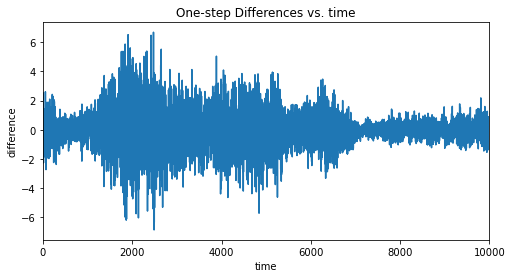

In [14]:
figure = plt.figure(figsize = (8,4))
subplot = plt.subplot()
x = time['time'][0:9999]
y = difference
subplot.set_title('One-step Differences vs. time')
subplot.set_xlabel('time')
subplot.set_xlim([0, 10000])
subplot.set_ylabel('difference')
subplot.plot(x,y)
plt.savefig('difference2.pdf')

It is shown in the notebook: stock_price_distributions, that using Kolmogorov-Smirnov test we can divide the time series "difference" into six disjoint subsets corresponding to different probability distributions of stock price increments.

Those sets correspond to the time intervals which are summarized as a dictionary:

In [15]:
dict = {'distribution 1': [(500,1000), (7500,9999)],
        'distribution 2': [(7000,7500)],
        'distribution 3': [(0,500), (5500, 6000), (6500,7000)],
        'distribution 4': [(2500,5500), (6000, 6500)],
        'distribution 5': [(1500,2500)],
        'distribution 6': [(1000,1500)]}
dict

{'distribution 1': [(500, 1000), (7500, 9999)],
 'distribution 2': [(7000, 7500)],
 'distribution 3': [(0, 500), (5500, 6000), (6500, 7000)],
 'distribution 4': [(2500, 5500), (6000, 6500)],
 'distribution 5': [(1500, 2500)],
 'distribution 6': [(1000, 1500)]}

This means that if time t is less than 500, the stock price increments are distributed according to "distribution 3".
When time t is between 500 and 1000, the stock price increments are distributed according to "distribution 1".
When time t is between 1000 and 1500, the stock price increments are distributed according to "distribution 6", etc.

In notebook: stock_price_distributions, those six distributions are characterized. 

Here, we use this information as given to answer the following question: "How do we predict the future stock price if we know the stock price up to time t?".

The obvious answer is: to predict the stock price at t+1, we use the known stock price at time t and add a random increment. 

To decide what random increment to use, we need to know t. For example, if 500 < t < 1000, we should choose a random number from "distribution 1". However, if 1000< t < 1500, we should choose a random number from "distribution 6", etc.

The following code predicts the stock price at time t+1, using the stock price at time t and adding a random number from the distribution selected according to the value of t.

To choose a random number, we use a random.choice() function, which picks a random element of a sequence. This way, we make sure that the correct distribution gets sampled depending on the value of t.

The code written here predicts stock price at t+1, but it can be easily generalized to predict the stock price at t+n.

In [7]:
import random
    
# predicting the future using the dictionary of distributions
# we predict y[t+1] using the known value of time['value'][t] and we add a random step
# where the random step is chosen from the distribution corresponding to that region of t
#if we are too close to the beginning of an interval with a new distribution (too few choices),
#we can use an earlier interval with the same distribution to generate a random step
y = [0]*9999   #initialize an array of zeros
y[0]=time['value'][0]  #take the value at t=0 to be the initial value of the series "time"
y[1]=time['value'][1]
for t in range(1,9998):
### checking if in the region of distribution 1
 if 500 < t <= 1000: #take the known value at [t] add a random step from 'distribution 1'
   y[t+1] = time['value'][t] + random.choice(list(difference[500:t]))
 elif 7500 < t < 9999:
   if t < 8000:  # use the previous region with the same distribution to generate the next step
      y[t+1] = time['value'][t] + random.choice(list(difference[500:1000]))
   else:
      y[t+1] = time['value'][t] + random.choice(list(difference[7500:t]))
### checking if in the region of distribution 2
 elif 7000< t <= 7500:
   y[t+1] = time['value'][t] + random.choice(list(difference[7000:t]))
### checking if in the region of distribution 3
 elif 0 < t <=500:
   y[t+1] = time['value'][t] + random.choice(list(difference[0:t]))
 elif 5500< t <= 6000:
   if t < 5600:  # use the previous region with the same distribution to generate the next step
      y[t+1] = time['value'][t] + random.choice(list(difference[0:500]))
   else:
      y[t+1] = time['value'][t] + random.choice(list(difference[5500:t]))
 elif 6500 < t <= 7000:
   if t < 6600: # use the previous region with the same distribution to generate the next step
      y[t+1] = time['value'][t] + random.choice(list(difference[5500:6000]))
   else:
      y[t+1] = time['value'][t] + random.choice(list(difference[6500:t]))
### checking if in the region of distribution 4
 elif 2500 < t <= 5500:
   y[t+1] = time['value'][t] + random.choice(list(difference[2500:t]))
 elif 6000 < t <= 6500:
   if t < 6600: # use the previous region with the same distribution to generate the next step
      y[t+1] = time['value'][t] + random.choice(list(difference[2500:5500]))
   else:
      y[t+1] = time['value'][t] + random.choice(list(difference[6000:t]))
### checking if in the region of distribution 5
 elif 1500 < t <= 2500:
   y[t+1] = time['value'][t] + random.choice(list(difference[1500:t]))
### checking if in the region of distribution 6
 elif 1000 < t <= 1500:
   y[t+1] = time['value'][t] + random.choice(list(difference[1000:t]))


Once we have our predicted values, we can plot them. 

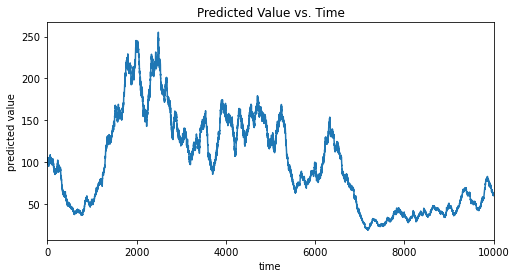

In [9]:
#we store the result as the list we call data
data = y

#we plot the set of data as a function of t, this is our prediction
figure = plt.figure(figsize = (8,4))
subplot = plt.subplot()
x = time['time'][0:9999]
y = data
subplot.set_title('Predicted Value vs. Time')
subplot.set_xlabel('time')
subplot.set_xlim([0, 10000])
subplot.set_ylabel('predicted value')
subplot.plot(x,y)
plt.savefig('predicted1_y(t+1).pdf')

The main question to ask is: how accurate is our prediction?

Here the actual values of the stock price are graphed in peach and predicted values are graphed in blue.

As you can see, one step predictions are very accurate.

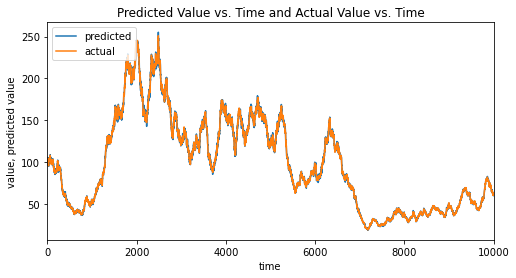

In [10]:
#we compare the prediction to the actual data set "time". The fit is close to perfect
figure = plt.figure(figsize = (8,4))
subplot = plt.subplot()
x = time['time'][0:9999]
y = data
z = time['value'][0:9999]
subplot.set_title('Predicted Value vs. Time and Actual Value vs. Time')
subplot.set_xlabel('time')
subplot.set_xlim([0, 10000])
subplot.set_ylabel('value, predicted value')
subplot.plot(x,y, label = 'predicted')
subplot.plot(x,z, label = 'actual')
plt.legend(loc = "upper left")
plt.savefig('predicted_y(t+1)_and_actual.pdf')

Of course, if we try to make an n-step prediction, the accuracy would decrease, because we are using random numbers sampled from a distribution. Even if the distribution is exactly the same, our sample sequence of random numbers would be different from the actual sequence of random numbers, because any two samples of the same distribution are different.

This work is done by Anastasia Ruzmaikina.